## 목적: ETRI 인프라엣지 데이터 전처리 pickle 데이터 코드 작성

### nuscene 분석
* python tools/create_data.py nuscenes_data_prep --root_path=NUSCENES_TRAINVAL_DATASET_ROOT --version="v1.0-trainval" --nsweeps=10


In [1]:
root_path = "/mnt/hdd0/nuScenes"
version = "v1.0-trainval"
nsweeps = 1

* nuscenes_data_prep 함수

In [2]:
"""
def nuscenes_data_prep(root_path, version, nsweeps=10, filter_zero=True, virtual=False):
    nu_ds.create_nuscenes_infos(root_path, version=version, nsweeps=nsweeps, filter_zero=filter_zero)
    if version == 'v1.0-trainval':
        create_groundtruth_database(
            "NUSC",
            root_path,
            Path(root_path) / "infos_train_{:02d}sweeps_withvelo_filter_{}.pkl".format(nsweeps, filter_zero),
            nsweeps=nsweeps,
            virtual=virtual
        )
"""
# nu_ds.create_nuscenes_infos(root_path, version=version, nsweeps=nsweeps, filter_zero=True)


'\ndef nuscenes_data_prep(root_path, version, nsweeps=10, filter_zero=True, virtual=False):\n    nu_ds.create_nuscenes_infos(root_path, version=version, nsweeps=nsweeps, filter_zero=filter_zero)\n    if version == \'v1.0-trainval\':\n        create_groundtruth_database(\n            "NUSC",\n            root_path,\n            Path(root_path) / "infos_train_{:02d}sweeps_withvelo_filter_{}.pkl".format(nsweeps, filter_zero),\n            nsweeps=nsweeps,\n            virtual=virtual\n        )\n'

* nu_ds.create_nuscenes_infos 함수

In [3]:
from nuscenes import NuScenes
nusc = NuScenes(version=version, dataroot=root_path, verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 34.3 seconds.
Reverse indexing ...
Done reverse indexing in 4.6 seconds.


In [4]:
from nuscenes.utils import splits
available_vers = ["v1.0-trainval", "v1.0-test", "v1.0-mini"]
assert version in available_vers
if version == "v1.0-trainval":
    train_scenes = splits.train
    # random.shuffle(train_scenes)
    # train_scenes = train_scenes[:int(len(train_scenes)*0.2)]
    val_scenes = splits.val

In [5]:
train_scenes

['scene-0001',
 'scene-0002',
 'scene-0004',
 'scene-0005',
 'scene-0006',
 'scene-0007',
 'scene-0008',
 'scene-0009',
 'scene-0010',
 'scene-0011',
 'scene-0019',
 'scene-0020',
 'scene-0021',
 'scene-0022',
 'scene-0023',
 'scene-0024',
 'scene-0025',
 'scene-0026',
 'scene-0027',
 'scene-0028',
 'scene-0029',
 'scene-0030',
 'scene-0031',
 'scene-0032',
 'scene-0033',
 'scene-0034',
 'scene-0041',
 'scene-0042',
 'scene-0043',
 'scene-0044',
 'scene-0045',
 'scene-0046',
 'scene-0047',
 'scene-0048',
 'scene-0049',
 'scene-0050',
 'scene-0051',
 'scene-0052',
 'scene-0053',
 'scene-0054',
 'scene-0055',
 'scene-0056',
 'scene-0057',
 'scene-0058',
 'scene-0059',
 'scene-0060',
 'scene-0061',
 'scene-0062',
 'scene-0063',
 'scene-0064',
 'scene-0065',
 'scene-0066',
 'scene-0067',
 'scene-0068',
 'scene-0069',
 'scene-0070',
 'scene-0071',
 'scene-0072',
 'scene-0073',
 'scene-0074',
 'scene-0075',
 'scene-0076',
 'scene-0120',
 'scene-0121',
 'scene-0122',
 'scene-0123',
 'scene-01

In [6]:
from pathlib import Path
root_path = Path(root_path)

def _get_available_scenes(nusc):
    available_scenes = []
    print("total scene num:", len(nusc.scene))
    for scene in nusc.scene:
        scene_token = scene["token"]
        scene_rec = nusc.get("scene", scene_token)
        sample_rec = nusc.get("sample", scene_rec["first_sample_token"])
        sd_rec = nusc.get("sample_data", sample_rec["data"]["LIDAR_TOP"])
        has_more_frames = True
        scene_not_exist = False
        while has_more_frames:
            lidar_path, boxes, _ = nusc.get_sample_data(sd_rec["token"])
            if not Path(lidar_path).exists():
                scene_not_exist = True
                break
            else:
                break
        if scene_not_exist:
            continue
        available_scenes.append(scene)
    print("exist scene num:", len(available_scenes))
    return available_scenes
available_scenes = _get_available_scenes(nusc)

total scene num: 850
exist scene num: 850


In [7]:
available_scenes

[{'token': '73030fb67d3c46cfb5e590168088ae39',
  'log_token': '6b6513e6c8384cec88775cae30b78c0e',
  'nbr_samples': 40,
  'first_sample_token': 'e93e98b63d3b40209056d129dc53ceee',
  'last_sample_token': '40e413c922184255a94f08d3c10037e0',
  'name': 'scene-0001',
  'description': 'Construction, maneuver between several trucks'},
 {'token': 'c3e0e9f6ee8d4170a3d22a6179f1ca3a',
  'log_token': '6b6513e6c8384cec88775cae30b78c0e',
  'nbr_samples': 40,
  'first_sample_token': '9e28820bd2ba4eb480e1b9079f17c30c',
  'last_sample_token': 'd0dc3c18dfc64c779bc9e4ee6e9e2e3b',
  'name': 'scene-0002',
  'description': 'Intersection, peds, waiting vehicle, parked motorcycle at parking lot'},
 {'token': 'e7ef871f77f44331aefdebc24ec034b7',
  'log_token': '92af2609d31445e5a71b2d895376fed6',
  'nbr_samples': 40,
  'first_sample_token': 'fd8420396768425eabec9bdddf7e64b6',
  'last_sample_token': '20684b77c01641e7a5ada48308a0b1e1',
  'name': 'scene-0003',
  'description': 'Parking lot, barrier, exit parking lot

In [8]:
available_scene_names = [s["name"] for s in available_scenes]

In [9]:
available_scene_names

['scene-0001',
 'scene-0002',
 'scene-0003',
 'scene-0004',
 'scene-0005',
 'scene-0006',
 'scene-0007',
 'scene-0008',
 'scene-0009',
 'scene-0010',
 'scene-0011',
 'scene-0012',
 'scene-0013',
 'scene-0014',
 'scene-0015',
 'scene-0016',
 'scene-0017',
 'scene-0018',
 'scene-0019',
 'scene-0020',
 'scene-0021',
 'scene-0022',
 'scene-0023',
 'scene-0024',
 'scene-0025',
 'scene-0026',
 'scene-0027',
 'scene-0028',
 'scene-0029',
 'scene-0030',
 'scene-0031',
 'scene-0032',
 'scene-0033',
 'scene-0034',
 'scene-0035',
 'scene-0036',
 'scene-0038',
 'scene-0039',
 'scene-0041',
 'scene-0042',
 'scene-0043',
 'scene-0044',
 'scene-0045',
 'scene-0046',
 'scene-0047',
 'scene-0048',
 'scene-0049',
 'scene-0050',
 'scene-0051',
 'scene-0052',
 'scene-0053',
 'scene-0054',
 'scene-0055',
 'scene-0056',
 'scene-0057',
 'scene-0058',
 'scene-0059',
 'scene-0060',
 'scene-0061',
 'scene-0062',
 'scene-0063',
 'scene-0064',
 'scene-0065',
 'scene-0066',
 'scene-0067',
 'scene-0068',
 'scene-00

In [10]:
train_scenes = list(filter(lambda x: x in available_scene_names, train_scenes))
val_scenes = list(filter(lambda x: x in available_scene_names, val_scenes))

In [11]:
train_scenes

['scene-0001',
 'scene-0002',
 'scene-0004',
 'scene-0005',
 'scene-0006',
 'scene-0007',
 'scene-0008',
 'scene-0009',
 'scene-0010',
 'scene-0011',
 'scene-0019',
 'scene-0020',
 'scene-0021',
 'scene-0022',
 'scene-0023',
 'scene-0024',
 'scene-0025',
 'scene-0026',
 'scene-0027',
 'scene-0028',
 'scene-0029',
 'scene-0030',
 'scene-0031',
 'scene-0032',
 'scene-0033',
 'scene-0034',
 'scene-0041',
 'scene-0042',
 'scene-0043',
 'scene-0044',
 'scene-0045',
 'scene-0046',
 'scene-0047',
 'scene-0048',
 'scene-0049',
 'scene-0050',
 'scene-0051',
 'scene-0052',
 'scene-0053',
 'scene-0054',
 'scene-0055',
 'scene-0056',
 'scene-0057',
 'scene-0058',
 'scene-0059',
 'scene-0060',
 'scene-0061',
 'scene-0062',
 'scene-0063',
 'scene-0064',
 'scene-0065',
 'scene-0066',
 'scene-0067',
 'scene-0068',
 'scene-0069',
 'scene-0070',
 'scene-0071',
 'scene-0072',
 'scene-0073',
 'scene-0074',
 'scene-0075',
 'scene-0076',
 'scene-0120',
 'scene-0121',
 'scene-0122',
 'scene-0123',
 'scene-01

In [12]:
val_scenes

['scene-0003',
 'scene-0012',
 'scene-0013',
 'scene-0014',
 'scene-0015',
 'scene-0016',
 'scene-0017',
 'scene-0018',
 'scene-0035',
 'scene-0036',
 'scene-0038',
 'scene-0039',
 'scene-0092',
 'scene-0093',
 'scene-0094',
 'scene-0095',
 'scene-0096',
 'scene-0097',
 'scene-0098',
 'scene-0099',
 'scene-0100',
 'scene-0101',
 'scene-0102',
 'scene-0103',
 'scene-0104',
 'scene-0105',
 'scene-0106',
 'scene-0107',
 'scene-0108',
 'scene-0109',
 'scene-0110',
 'scene-0221',
 'scene-0268',
 'scene-0269',
 'scene-0270',
 'scene-0271',
 'scene-0272',
 'scene-0273',
 'scene-0274',
 'scene-0275',
 'scene-0276',
 'scene-0277',
 'scene-0278',
 'scene-0329',
 'scene-0330',
 'scene-0331',
 'scene-0332',
 'scene-0344',
 'scene-0345',
 'scene-0346',
 'scene-0519',
 'scene-0520',
 'scene-0521',
 'scene-0522',
 'scene-0523',
 'scene-0524',
 'scene-0552',
 'scene-0553',
 'scene-0554',
 'scene-0555',
 'scene-0556',
 'scene-0557',
 'scene-0558',
 'scene-0559',
 'scene-0560',
 'scene-0561',
 'scene-05

In [13]:
train_scenes = set(
    [
        available_scenes[available_scene_names.index(s)]["token"]
        for s in train_scenes
    ]
)
val_scenes = set(
    [available_scenes[available_scene_names.index(s)]["token"] for s in val_scenes]
)

In [14]:
train_scenes

{'0053e9c440a94c1b84bd9c4223efc4b0',
 '00590cbfa24a430a8c274b51e1c71231',
 '010fb5bcc7984d0f8f07f99e02366df1',
 '01796494e25c448dadaba70cfcc3532d',
 '019b370afb444a2e8ce85654898307c8',
 '01c3f5e39956402da3e37845632fadca',
 '01c8c59260db4a3682d7b4f8da65425e',
 '0287702725184161af95373198546a59',
 '02e484442a2f411b971edcf96ebbe885',
 '02f1e5e2fc544798aad223f5ae5e8440',
 '034256c9639044f98da7562ef3de3646',
 '03a8a37d5d444674bae34336e78ac39d',
 '03ee880dd4e348f4b3407f0d073c7c70',
 '04061484361145f5ac6f90a5103b84a6',
 '04e5f089805540a5a9e73c1b7c54ee8c',
 '055a607b74e04001adef097225a8661a',
 '05d5241d4d5a4c2a9c670dc8c9853c74',
 '06c43bc74aff453081ce83eb126a756e',
 '078e6d7a3d4a429bba404bf12c7a98f2',
 '08110c8640454affb5167801442a85fd',
 '087c6e521e974c708d49cac1db095691',
 '08be42eb2186411d8e2201225329f1c6',
 '095d9b93b583425f910ae2afaf1d017d',
 '098c11f50ff2425a9ff994e004de1216',
 '09f67057dd8346388b28f79d9bb1cf04',
 '0b8948ee96ac46faad405bf1ffc70bb1',
 '0be1ff07a8f148ca9535fb7f0deaf828',
 

In [15]:
print(f"train scene: {len(train_scenes)}, val scene: {len(val_scenes)}")

train scene: 700, val scene: 150


In [16]:
from det3d.datasets.nuscenes.nusc_common import _fill_trainval_infos
test = False
filter_zero = True
train_nusc_infos, val_nusc_infos = _fill_trainval_infos(
        nusc, train_scenes, val_scenes, test, nsweeps=nsweeps, filter_zero=filter_zero
    )

/home/jaelee/objdect/CenterPoint/det3d/core/bbox/geometry.py:149: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/home/jaelee/objdect/CenterPoint/det3d/core/bbox/geometry.py:162: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/home/jaelee/objdect/CenterPoint/det3d/core/bbox/geometry.py:280: NumbaDeprecationWa

no apex
No Tensorflow


  1%|          | 224/34149 [00:10<25:56, 21.80it/s]  


KeyboardInterrupt: 

In [ ]:
print(f"train sample: {len(train_nusc_infos)}, val sample: {len(val_nusc_infos)}")

In [ ]:
train_nusc_infos[0]
"""
{'lidar_path': '/mnt/hdd0/nuScenes/samples/LIDAR_TOP/n015-2018-07-18-11-07-57+0800__LIDAR_TOP__1531883530449377.pcd.bin',
 'cam_front_path': '/mnt/hdd0/nuScenes/samples/CAM_FRONT/n015-2018-07-18-11-07-57+0800__CAM_FRONT__1531883530412470.jpg',
 'cam_intrinsic': array([[1.26641720e+03, 0.00000000e+00, 8.16267020e+02],
        [0.00000000e+00, 1.26641720e+03, 4.91507066e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'token': 'e93e98b63d3b40209056d129dc53ceee',
 'sweeps': [],
 'ref_from_car': array([[ 0.00203327, -0.99998053, -0.00589965,  0.00893789],
        [ 0.99970406,  0.00217566, -0.02422936, -0.89884612],
        [ 0.02424172, -0.00584864,  0.99968902, -1.86253495],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'car_from_global': array([[ 1.23886954e-01,  9.92036123e-01,  2.27234240e-02,
         -7.31089020e+02],
        [-9.92293997e-01,  1.23903923e-01,  6.65101391e-04,
          9.26666849e+02],
        [-2.15571678e-03, -2.26307146e-02,  9.99741568e-01,
          1.60006535e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 'timestamp': 1531883530.4493768,
 'all_cams_from_lidar': [array([[ 0.99995012, -0.00694924,  0.00717441,  0.00573034],
         [ 0.00730543,  0.01901527, -0.9997925 , -0.32185337],
         [ 0.00681137,  0.99979504,  0.01906509, -0.60214521],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[ 0.5447327 , -0.83820065, -0.02619095,  0.12293207],
         [-0.01001924,  0.02472418, -0.9996441 , -0.33308552],
         [ 0.83854988,  0.54480124,  0.00506993, -0.68732649],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[-0.36268682, -0.93121605, -0.03598531,  0.14839688],
         [-0.00462228,  0.04041165, -0.99917242, -0.26959537],
         [ 0.93189962, -0.36222033, -0.01896112, -0.46460071],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[-9.99913640e-01,  8.13340016e-03, -1.03227952e-02,
          -7.44204072e-04],
         [ 1.03842656e-02,  7.55213332e-03, -9.99917563e-01,
          -2.76015310e-01],
         [-8.05477054e-03, -9.99938405e-01, -7.63594051e-03,
          -9.62210745e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]]),
  array([[-0.31651335,  0.94826328,  0.02482031, -0.23283082],
         [ 0.02013239,  0.03287486, -0.99925669, -0.24295853],
         [-0.94837439, -0.31577839, -0.02949614, -0.43680516],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[ 0.58312896,  0.81208429,  0.02190271, -0.04473946],
         [ 0.00348856,  0.02445774, -0.99969478, -0.32748055],
         [-0.81237211,  0.58302738,  0.01142902, -0.62206131],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])],
 'all_cams_intrinsic': [array([[1.26641720e+03, 0.00000000e+00, 8.16267020e+02],
         [0.00000000e+00, 1.26641720e+03, 4.91507066e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([[1.26084744e+03, 0.00000000e+00, 8.07968245e+02],
         [0.00000000e+00, 1.26084744e+03, 4.95334427e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([[1.25951374e+03, 0.00000000e+00, 8.07252905e+02],
         [0.00000000e+00, 1.25951374e+03, 5.01195799e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([[809.22099057,   0.        , 829.21960033],
         [  0.        , 809.22099057, 481.77842385],
         [  0.        ,   0.        ,   1.        ]]),
  array([[1.25674148e+03, 0.00000000e+00, 7.92112574e+02],
         [0.00000000e+00, 1.25674148e+03, 4.92775747e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([[1.27259795e+03, 0.00000000e+00, 8.26615493e+02],
         [0.00000000e+00, 1.27259795e+03, 4.79751654e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])],
 'all_cams_path': ['/mnt/hdd0/nuScenes/samples/CAM_FRONT/n015-2018-07-18-11-07-57+0800__CAM_FRONT__1531883530412470.jpg',
  '/mnt/hdd0/nuScenes/samples/CAM_FRONT_RIGHT/n015-2018-07-18-11-07-57+0800__CAM_FRONT_RIGHT__1531883530420339.jpg',
  '/mnt/hdd0/nuScenes/samples/CAM_BACK_RIGHT/n015-2018-07-18-11-07-57+0800__CAM_BACK_RIGHT__1531883530427893.jpg',
  '/mnt/hdd0/nuScenes/samples/CAM_BACK/n015-2018-07-18-11-07-57+0800__CAM_BACK__1531883530437525.jpg',
  '/mnt/hdd0/nuScenes/samples/CAM_BACK_LEFT/n015-2018-07-18-11-07-57+0800__CAM_BACK_LEFT__1531883530447423.jpg',
  '/mnt/hdd0/nuScenes/samples/CAM_FRONT_LEFT/n015-2018-07-18-11-07-57+0800__CAM_FRONT_LEFT__1531883530404844.jpg'],
 'gt_boxes': array([[-1.61843454e+01, -1.17404151e+00, -1.24046699e+00,
          3.00000000e-01,  2.91000000e-01,  7.34000000e-01,
         -7.33362544e-03,  2.72897259e-02,  1.36455067e+00],
        [-1.54493912e+01, -4.28768163e+00, -1.30136452e+00,
          3.15000000e-01,  3.38000000e-01,  7.12000000e-01,
         -2.24771335e-02,  7.38157019e-02,  1.25993331e+00],
        [-1.02275670e+01,  1.94608211e+01,  3.74364245e-02,
          2.31200000e+00,  7.51600000e+00,  3.09300000e+00,
          5.98614469e-02,  6.99637269e-02, -9.64144213e-01],
        [ 9.21442005e+00, -5.57960735e+00, -1.07856950e+00,
          1.63800000e+00,  4.25000000e+00,  1.44000000e+00,
          5.52849014e+00,  1.19551431e+00, -1.92929042e+00],
        [-1.57271212e+01, -8.16090985e-01, -6.97936424e-01,
          7.39000000e-01,  5.63000000e-01,  1.71100000e+00,
         -2.59654373e-02,  9.95243959e-02,  1.36455067e+00],
        [ 3.84646471e-01, -1.32284491e+01, -1.21462740e+00,
          1.87100000e+00,  4.47800000e+00,  1.45600000e+00,
          2.43858125e+00,  4.21280600e+00, -2.66401236e+00],
        [-4.75276596e+01,  3.51366615e+01,  6.94957388e-01,
          2.87700000e+00,  6.37200000e+00,  2.97800000e+00,
          7.80274278e-03,  9.31589349e-03, -4.15992929e+00],
        [-1.61056541e+01, -7.16475402e-02, -6.86282715e-01,
          6.65000000e-01,  5.44000000e-01,  1.73900000e+00,
          9.22827616e-02,  1.22105407e-01,  1.36455067e+00],
        [-1.59411481e+01, -2.44787704e+00, -1.28580015e+00,
          3.38000000e-01,  3.09000000e-01,  7.12000000e-01,
         -4.25165705e-03,  2.37075899e-02,  1.35798077e+00],
        [-1.93828613e+01,  2.55393813e+01,  3.19190807e-02,
          2.15600000e+00,  6.22700000e+00,  2.60100000e+00,
          1.95338378e-03,  4.51088029e-04, -1.05998024e+00]]),
 'gt_boxes_velocity': array([[-7.33362544e-03,  2.72897259e-02, -6.00158108e-03],
        [-2.24771335e-02,  7.38157019e-02, -9.99496837e-02],
        [ 5.98614469e-02,  6.99637269e-02, -2.99247444e-01],
        [ 5.52849014e+00,  1.19551431e+00,  3.78292656e-02],
        [-2.59654373e-02,  9.95243959e-02, -4.99765823e-02],
        [ 2.43858125e+00,  4.21280600e+00,  2.22328213e-02],
        [ 7.80274278e-03,  9.31589349e-03, -4.33563139e-01],
        [ 9.22827616e-02,  1.22105407e-01, -8.31428142e-02],
        [-4.25165705e-03,  2.37075899e-02, -9.99063174e-02],
        [ 1.95338378e-03,  4.51088029e-04, -2.99729455e-01]]),
 'gt_names': array(['traffic_cone', 'traffic_cone', 'truck', 'car', 'pedestrian',
        'car', 'truck', 'pedestrian', 'traffic_cone', 'truck'],
       dtype='<U12'),
 'gt_boxes_token': array(['173a50411564442ab195e132472fde71',
        '5123ed5e450948ac8dc381772f2ae29a',
        'acce0b7220754600b700257a1de1573d',
        '8d7cb5e96cae48c39ef4f9f75182013a',
        'f64bfd3d4ddf46d7a366624605cb7e91',
        'f9dba7f32ed34ee8adc92096af767868',
        '086e3f37a44e459987cde7a3ca273b5b',
        '3964235c58a745df8589b6a626c29985',
        '31a96b9503204a8688da75abcd4b56b2',
        'b0284e14d17a444a8d0071bd1f03a0a2'], dtype='<U32')}
"""

In [ ]:
# nusc info에서 내가 필요한 key
# 1. 'lidar_path': '/mnt/hdd0/nuScenes/samples/LIDAR_TOP/n015-2018-07-18-11-07-57+0800__LIDAR_TOP__1531883530449377.pcd.bin'
# 2. 'timestamp': 1531883530.4493768
# 3. 'gt_boxes' Nx9 numpy array => 난 velocity가 없으므로 N x 7
# 4. 'gt_names': array(['traffic_cone', 'traffic_cone', 'truck', 'car', 'pedestrian', 'car', 'truck', 'pedestrian', 'traffic_cone', 'truck'], dtype='<U12'),
# gt_boxes_velocity => 있지만 난 안씀

In [ ]:
# pickle 저장
import pickle
with open(root_path / "infos_train_{:02d}example{}.pkl".format(nsweeps, filter_zero), "wb") as f:
    pickle.dump(train_nusc_infos, f)
with open(root_path / "infos_val_{:02d}example{}.pkl".format(nsweeps, filter_zero), "wb") as f:
    pickle.dump(val_nusc_infos, f)

* create_groundtruth_database 함수

In [17]:
from pathlib import Path
root_path = "/mnt/hdd0/nuScenes"
version = "v1.0-trainval"
nsweeps = 1

In [18]:
'''
create_groundtruth_database(
            "NUSC",
            root_path,
            Path(root_path) / "infos_train_{:02d}sweeps_withvelo_filter_{}.pkl".format(nsweeps, filter_zero),
            nsweeps=nsweeps,
            virtual=virtual
        )
'''
filter_zero = True
nsweeps=1
dataset_class_name = "NUSC"
data_path = root_path
info_path = Path(root_path) / "infos_train_{:02d}example{}.pkl".format(nsweeps, filter_zero)
virtual = False

In [19]:
dataset_name_map = {
    "NUSC": "NuScenesDataset",
    "WAYMO": "WaymoDataset"
}

pipeline = [
        {
            "type": "LoadPointCloudFromFile",
            "dataset": dataset_name_map[dataset_class_name],
        },
        {"type": "LoadPointCloudAnnotations", "with_bbox": True},
    ]

In [24]:
from det3d.datasets.dataset_factory import get_dataset
# NuScenesDataset(info_path=info_path, root_path=data_path, test_mode=True, pipeline=pipeline)
dataset = get_dataset(dataset_class_name)(info_path=info_path, nsweeps=1, root_path=data_path, test_mode=True, pipeline=pipeline)

1


In [27]:
dataset[0]['lidar']['points'][0]

array([-3.1790197 , -0.14813471, -1.8944526 ,  4.        ], dtype=float32)

In [ ]:
db_path = None
dbinfo_path = None
root_path = Path(root_path)
if dataset_class_name in ["WAYMO", "NUSC"]: 
    if db_path is None:
        if virtual:
            db_path = root_path / f"gt_database_{nsweeps}sweeps_withvelo_virtual"
        else:
            db_path = root_path / f"gt_database_{nsweeps}sweeps_example_withvelo"
    if dbinfo_path is None:
        if virtual:
            dbinfo_path = root_path / f"dbinfos_train_{nsweeps}sweeps_withvelo_virtual.pkl"
        else:
            dbinfo_path = root_path / f"dbinfos_train_{nsweeps}sweeps_example_withvelo.pkl"
else:
    raise NotImplementedError()
print(f"db_path: {db_path}")
print(f"dbinfo_path: {dbinfo_path}")

# 박스안의 point
db_path.mkdir(parents=True, exist_ok=True)

In [ ]:
all_db_infos = {} # 최종 딕셔너리
group_counter = 0
# 이후 코드
'''
    for index in tqdm(range(len(dataset))):
        image_idx = index
        # modified to nuscenes
        sensor_data = dataset.get_sensor_data(index)
        if "image_idx" in sensor_data["metadata"]:
            image_idx = sensor_data["metadata"]["image_idx"]

        if nsweeps > 1: 
            points = sensor_data["lidar"]["combined"]
        else:
            points = sensor_data["lidar"]["points"]
            
        annos = sensor_data["lidar"]["annotations"]
        gt_boxes = annos["boxes"]
        names = annos["names"]

        if dataset_class_name == 'WAYMO':
            # waymo dataset contains millions of objects and it is not possible to store
            # all of them into a single folder
            # we randomly sample a few objects for gt augmentation
            # We keep all cyclist as they are rare 
            if index % 4 != 0:
                mask = (names == 'VEHICLE') 
                mask = np.logical_not(mask)
                names = names[mask]
                gt_boxes = gt_boxes[mask]

            if index % 2 != 0:
                mask = (names == 'PEDESTRIAN')
                mask = np.logical_not(mask)
                names = names[mask]
                gt_boxes = gt_boxes[mask]

        group_dict = {}
        group_ids = np.full([gt_boxes.shape[0]], -1, dtype=np.int64)
        if "group_ids" in annos:
            group_ids = annos["group_ids"]
        else:
            group_ids = np.arange(gt_boxes.shape[0], dtype=np.int64)
        difficulty = np.zeros(gt_boxes.shape[0], dtype=np.int32)
        if "difficulty" in annos:
            difficulty = annos["difficulty"]

        num_obj = gt_boxes.shape[0]
        if num_obj == 0:
            continue 
        point_indices = box_np_ops.points_in_rbbox(points, gt_boxes)
        for i in range(num_obj):
            if (used_classes is None) or names[i] in used_classes:
                filename = f"{image_idx}_{names[i]}_{i}.bin"
                dirpath = os.path.join(str(db_path), names[i])
                os.makedirs(dirpath, exist_ok=True)

                filepath = os.path.join(str(db_path), names[i], filename)
                gt_points = points[point_indices[:, i]]
                gt_points[:, :3] -= gt_boxes[i, :3]
                with open(filepath, "w") as f:
                    try:
                        gt_points.tofile(f)
                    except:
                        print("process {} files".format(index))
                        break

            if (used_classes is None) or names[i] in used_classes:
                if relative_path:
                    db_dump_path = os.path.join(db_path.stem, names[i], filename)
                else:
                    db_dump_path = str(filepath)

                db_info = {
                    "name": names[i],
                    "path": db_dump_path,
                    "image_idx": image_idx,
                    "gt_idx": i,
                    "box3d_lidar": gt_boxes[i],
                    "num_points_in_gt": gt_points.shape[0],
                    "difficulty": difficulty[i],
                    # "group_id": -1,
                    # "bbox": bboxes[i],
                }
                local_group_id = group_ids[i]
                # if local_group_id >= 0:
                if local_group_id not in group_dict:
                    group_dict[local_group_id] = group_counter
                    group_counter += 1
                db_info["group_id"] = group_dict[local_group_id]
                if "score" in annos:
                    db_info["score"] = annos["score"][i]
                if names[i] in all_db_infos:
                    all_db_infos[names[i]].append(db_info)
                else:
                    all_db_infos[names[i]] = [db_info]

'''

In [ ]:
# index = 0의 dataset
# = dataset.get_sensor_data(index)
index = 0
dataset[index]
'''
{'lidar': {'type': 'lidar',
  'points': array([[-3.1790197e+00, -1.4813471e-01, -1.8944526e+00,  4.0000000e+00],
         [-3.3147244e+00, -1.4445566e-01, -1.8713316e+00,  1.6000000e+01],
         [-3.4914439e+00, -1.4043893e-01, -1.8650968e+00,  1.8000000e+01],
         ...,
         [-3.8604591e+01,  1.3470740e-02,  5.4255247e+00,  2.2000000e+01],
         [-3.8612335e+01,  2.6992869e-02,  6.3437757e+00,  3.6000000e+01],
         [-3.8616589e+01,  4.0442500e-02,  7.2757368e+00,  2.7000000e+01]],
        dtype=float32),
  'nsweeps': 1,
  'annotations': {'boxes': array([[-1.61843452e+01, -1.17404151e+00, -1.24046695e+00,
            3.00000012e-01,  2.91000009e-01,  7.34000027e-01,
           -7.33362557e-03,  2.72897258e-02,  1.36455071e+00],
          [-1.54493914e+01, -4.28768158e+00, -1.30136454e+00,
            3.14999998e-01,  3.38000000e-01,  7.12000012e-01,
           -2.24771332e-02,  7.38157034e-02,  1.25993335e+00],
          [-1.02275667e+01,  1.94608212e+01,  3.74364257e-02,
            2.31200004e+00,  7.51599979e+00,  3.09299994e+00,
            5.98614477e-02,  6.99637234e-02, -9.64144230e-01],
          [ 9.21442032e+00, -5.57960749e+00, -1.07856953e+00,
            1.63800001e+00,  4.25000000e+00,  1.44000006e+00,
            5.52849007e+00,  1.19551432e+00, -1.92929041e+00],
          [-1.57271214e+01, -8.16091001e-01, -6.97936416e-01,
            7.39000022e-01,  5.63000023e-01,  1.71099997e+00,
           -2.59654373e-02,  9.95243937e-02,  1.36455071e+00],
          [ 3.84646475e-01, -1.32284489e+01, -1.21462739e+00,
            1.87100005e+00,  4.47800016e+00,  1.45599997e+00,
            2.43858123e+00,  4.21280622e+00, -2.66401243e+00],
          [-4.75276604e+01,  3.51366615e+01,  6.94957376e-01,
            2.87700009e+00,  6.37200022e+00,  2.97799993e+00,
            7.80274300e-03,  9.31589305e-03, -4.15992928e+00],
          [-1.61056538e+01, -7.16475397e-02, -6.86282694e-01,
            6.65000021e-01,  5.44000030e-01,  1.73899996e+00,
            9.22827646e-02,  1.22105405e-01,  1.36455071e+00],
          [-1.59411478e+01, -2.44787693e+00, -1.28580010e+00,
            3.38000000e-01,  3.08999985e-01,  7.12000012e-01,
           -4.25165705e-03,  2.37075891e-02,  1.35798073e+00],
          [-1.93828621e+01,  2.55393810e+01,  3.19190808e-02,
            2.15599990e+00,  6.22700024e+00,  2.60100007e+00,
            1.95338367e-03,  4.51088039e-04, -1.05998027e+00]], dtype=float32),
   'names': array(['traffic_cone', 'traffic_cone', 'truck', 'car', 'pedestrian',
          'car', 'truck', 'pedestrian', 'traffic_cone', 'truck'],
         dtype='<U12'),
   'tokens': array(['173a50411564442ab195e132472fde71',
          '5123ed5e450948ac8dc381772f2ae29a',
          'acce0b7220754600b700257a1de1573d',
          '8d7cb5e96cae48c39ef4f9f75182013a',
          'f64bfd3d4ddf46d7a366624605cb7e91',
          'f9dba7f32ed34ee8adc92096af767868',
          '086e3f37a44e459987cde7a3ca273b5b',
          '3964235c58a745df8589b6a626c29985',
          '31a96b9503204a8688da75abcd4b56b2',
          'b0284e14d17a444a8d0071bd1f03a0a2'], dtype='<U32'),
   'velocities': array([[-7.33362557e-03,  2.72897258e-02, -6.00158097e-03],
          [-2.24771332e-02,  7.38157034e-02, -9.99496803e-02],
          [ 5.98614477e-02,  6.99637234e-02, -2.99247444e-01],
          [ 5.52849007e+00,  1.19551432e+00,  3.78292650e-02],
          [-2.59654373e-02,  9.95243937e-02, -4.99765836e-02],
          [ 2.43858123e+00,  4.21280622e+00,  2.22328212e-02],
          [ 7.80274300e-03,  9.31589305e-03, -4.33563143e-01],
          [ 9.22827646e-02,  1.22105405e-01, -8.31428170e-02],
          [-4.25165705e-03,  2.37075891e-02, -9.99063179e-02],
          [ 1.95338367e-03,  4.51088039e-04, -2.99729466e-01]], dtype=float32)},
  'times': array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]], dtype=float32),
  'combined': array([[-3.1790197e+00, -1.4813471e-01, -1.8944526e+00,  4.0000000e+00,
           0.0000000e+00],
         [-3.3147244e+00, -1.4445566e-01, -1.8713316e+00,  1.6000000e+01,
           0.0000000e+00],
         [-3.4914439e+00, -1.4043893e-01, -1.8650968e+00,  1.8000000e+01,
           0.0000000e+00],
         ...,
         [-3.8604591e+01,  1.3470740e-02,  5.4255247e+00,  2.2000000e+01,
           0.0000000e+00],
         [-3.8612335e+01,  2.6992869e-02,  6.3437757e+00,  3.6000000e+01,
           0.0000000e+00],
         [-3.8616589e+01,  4.0442500e-02,  7.2757368e+00,  2.7000000e+01,
           0.0000000e+00]], dtype=float32)},
 'metadata': {'image_prefix': PosixPath('/mnt/hdd0/nuScenes'),
  'num_point_features': 5,
  'token': 'e93e98b63d3b40209056d129dc53ceee'},
 'calib': None,
 'cam': {},
 'mode': 'val',
 'virtual': False,
 'type': 'NuScenesDataset'}
'''

In [ ]:
sensor_data = dataset.get_sensor_data(index)
points = sensor_data["lidar"]["points"]

In [ ]:
annos = sensor_data["lidar"]["annotations"]
gt_boxes = annos["boxes"]
names = annos["names"]

In [ ]:
import numpy as np
group_dict = {}
group_ids = np.arange(gt_boxes.shape[0], dtype=np.int64)

In [ ]:
group_ids

In [ ]:
if "group_ids" in annos:
    group_ids = annos["group_ids"]
else:
    group_ids = np.arange(gt_boxes.shape[0], dtype=np.int64)

In [ ]:
group_ids

In [ ]:
difficulty = np.zeros(gt_boxes.shape[0], dtype=np.int32)
if "difficulty" in annos:
    difficulty = annos["difficulty"]

In [ ]:
difficulty

In [ ]:
num_obj = gt_boxes.shape[0]
num_obj

In [ ]:
from det3d.core import box_np_ops
point_indices = box_np_ops.points_in_rbbox(points, gt_boxes)

In [ ]:
import os
i = 0
image_idx = 0
used_classes = None
if (used_classes is None) or names[i] in used_classes:
    filename = f"{image_idx}_{names[i]}_{i}.bin"
    dirpath = os.path.join(str(db_path), names[i])
    os.makedirs(dirpath, exist_ok=True)

    filepath = os.path.join(str(db_path), names[i], filename)
    gt_points = points[point_indices[:, i]]
    gt_points[:, :3] -= gt_boxes[i, :3]
    with open(filepath, "w") as f:
        try:
            gt_points.tofile(f)
        except:
            print("process {} files".format(index))
            break

if (used_classes is None) or names[i] in used_classes:
    if relative_path:
        db_dump_path = os.path.join(db_path.stem, names[i], filename)
    else:
        db_dump_path = str(filepath)

    db_info = {
        "name": names[i],
        "path": db_dump_path,
        "image_idx": image_idx,
        "gt_idx": i,
        "box3d_lidar": gt_boxes[i],
        "num_points_in_gt": gt_points.shape[0],
        "difficulty": difficulty[i],
        # "group_id": -1,
        # "bbox": bboxes[i],
    }
    local_group_id = group_ids[i]
    # if local_group_id >= 0:
    if local_group_id not in group_dict:
        group_dict[local_group_id] = group_counter
        group_counter += 1
    db_info["group_id"] = group_dict[local_group_id]
    if "score" in annos:
        db_info["score"] = annos["score"][i]
    if names[i] in all_db_infos:
        all_db_infos[names[i]].append(db_info)
    else:
        all_db_infos[names[i]] = [db_info]

## 인프라 엣지 pickle데이터 코드 제작

In [1]:
"""
목표1 : root_path / "infos_train_{:02d}sweeps_withoutvelo_filter_{}.pkl".format(nsweeps, filter_zero) 제작
{'lidar_path': 라이다 파일 절대경로,
'sweeps': None, 
'timestamp': 현재 시간,
'gt_boxes': ground truth 3D box | np.array('float') | [N, 7],
'gt_boxes_velocity': None,
'gt_names': 물체 클래스 | np.array('string') | [N]
}
"""
chdir = False

In [2]:
import os
import json
from tqdm import tqdm

In [3]:
# placeholder 생성
if not chdir:
    os.chdir('../')
    chdir = True

data_folder = []
data = dict()
root_dir = "data/etri3Dobj_infra_edge"
meta_file= ['sensor.json', 'log.json', 'dataset.json', 'ego_pose.json', 'frame_annotation.json', 'instance.json', 'frame_data.json', 'frame.json']
for (root, dirs, file) in os.walk(root_dir):
    if "meta" in dirs:
        data_folder.append(root)

print(data_folder)
for d in data_folder:
    for m in meta_file:
        file_name = d + '/meta/' + m
        if m == 'frame.json':
            with open(file_name, 'r') as f:
                json_data = json.load(f)
            idx = 0

            nex_frame_uuid = json_data[idx]['uuid']
            while (nex_frame_uuid != None):
                cur_frame = json_data[idx]
                assert (nex_frame_uuid == cur_frame['uuid'])
                nex_frame_uuid = cur_frame['next']
                
                if cur_frame['dataset_uuid'] not in data:
                    data[cur_frame['dataset_uuid']] = dict()
                # data -> dataset_uuid -> frame_uuid 순으로 디렉토리 생성
                data[cur_frame['dataset_uuid']][cur_frame['uuid']] = dict()
                # det3d 인풋형식 맞추기
                data[cur_frame['dataset_uuid']][cur_frame['uuid']]['type'] = 'lidar'
                idx += 1


['data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220825093523_Teslasystem_PE01)_time(1661420123_1661420423)', 'data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220525183945_Teslasystem_PE01)_time(1653471585_1653471618)', 'data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220525185829_Teslasystem_PE01)_time(1653472709_1653472765)', 'data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220525191037_Teslasystem_PE01)_time(1653473437_1653473486)', 'data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220406153541_Teslasystem_PE01)_time(1649226941_1649226984)', 'data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220525191647_Teslasystem_PE01)_time(1653473807_1653473883)', 'data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/round(20220525184030_Teslasystem_PE01)_time(1653471630_1653471668)', 'data/etri3Dobj_infra_edge/3D_object_det

In [7]:
import open3d as o3d
import numpy as np
halt = False
for d in tqdm(data_folder):
    for m in meta_file:
        file_name = d + '/meta/' + m
        if m == 'frame_data.json':
            with open(file_name, 'r') as f:
                json_data = json.load(f)
            for i in json_data:
                if (i['file_format'] == 'pcd'):
                    lidar_file_name = d + '/sensor/lidar(00)/' + i['file_name'] + '.' + i['file_format']
                    pcd = o3d.io.read_point_cloud(lidar_file_name)
                    out_arr = np.asarray(pcd.points, dtype=np.float32)
                    for k in data.keys():
                        if i['frame_uuid'] in data[k]:
                            data[k][i['frame_uuid']]['points'] = out_arr
                            data[k][i['frame_uuid']]['annotations'] = {'boxes': [], 'names': []}

100%|██████████| 19/19 [08:13<00:00, 25.98s/it]


In [8]:
data[k][i['frame_uuid']]

{'type': 'lidar',
 'points': array([[-3.2379033e-04,  1.5458530e-01,  4.1270766e-02],
        [ 1.3490141e-04,  1.5458558e-01,  4.1270766e-02],
        [ 6.9811306e-04,  1.7390746e-01,  4.6429612e-02],
        ...,
        [-1.6879347e-03,  1.3068400e-01, -3.7614439e-02],
        [-1.4652482e-03,  1.4990757e-01, -4.3145973e-02],
        [-9.4326300e-04,  1.4222367e-01, -4.0933359e-02]], dtype=float32),
 'annotations': {'boxes': [], 'names': []}}

In [9]:
instance_to_name = {'dynamic_object.vehicle.personal_mobility': 'personal_mobility',
                    'dynamic_object.vehicle.bus': 'bus',
                    'dynamic_object.vehicle.bicycle': 'bicycle',
                    'dynamic_object.vehicle.car' : 'car',
                    'dynamic_object.vehicle.construction_vehicle': 'construction_vehicle',
                    'dynamic_object.vehicle.motorcycle': 'motorcycle',
                    'dynamic_object.vehicle.truck': 'truck',
                    'dynamic_object.human.pedestrian': 'pedestrian',
                    'dynamic_object.animal.ground_animal': 'ground_animal'}
frame_data_to_frame_uuid = dict()
for d in data_folder:
    for m in meta_file:
        file_name = d + '/meta/' + m
        if m == 'frame_data.json':
            with open(file_name, 'r') as f:
                json_data = json.load(f)
            for i in json_data:
                frame_data_to_frame_uuid[i['uuid']] = i['frame_uuid']
instance_to_category_name = dict()
for d in data_folder:
    for m in meta_file:
        file_name = d + '/meta/' + m
        if m == 'instance.json':
            with open(file_name, 'r') as f:
                json_data = json.load(f)
            for i in json_data:
                instance_to_category_name[i['uuid']] = instance_to_name[i['category_name']]
                                       

In [10]:
def quaternion_to_euler_angle_z(orientation):
    w, x, y, z = orientation
    ysqr = y * y

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    # Z = np.degrees(np.arctan2(t3, t4))
    Z = np.arctan2(t3, t4)
    return Z
success = fail = 0
for d in tqdm(data_folder):
    for m in meta_file:
        file_name = d + '/meta/' + m
        if m == 'frame_annotation.json':
            with open(file_name, 'r') as f:
                json_data = json.load(f)
            for i in json_data:
                if i['is_lidar_synced'] == False:
                    try:
                        tmp_arr = np.concatenate((np.array(i['geometry']['center']), np.array(i['geometry']['wlh']), np.array([0.0, 0.0, quaternion_to_euler_angle_z(i['geometry']['orientation'])])))
                    except:
                        continue
                    # print(frame_data_to_frame_uuid[i['frame_data_uuid']])
                    frame_uuid = frame_data_to_frame_uuid[i['frame_data_uuid']]
                    for k in data.keys():
                        try:
                            if frame_uuid in data[k]:
                                data[k][frame_uuid]['annotations']['boxes'].append(tmp_arr)
                                data[k][frame_uuid]['annotations']['names'].append(instance_to_category_name[i['instance_uuid']])
                                success += 1
                        except:
                            fail += 1

100%|██████████| 19/19 [00:38<00:00,  2.02s/it]


In [11]:
data[k]

{'7acd9870-1495-49f4-800c-9396653b5b5c': {'type': 'lidar',
  'points': array([[-3.4807459e-04,  1.6617920e-01,  4.4366073e-02],
         [ 1.4164648e-04,  1.6231488e-01,  4.3334305e-02],
         [ 6.6708575e-04,  1.6617823e-01,  4.4366073e-02],
         ...,
         [-1.9361604e-03,  1.4990222e-01, -4.3145973e-02],
         [-1.3525367e-03,  1.3837622e-01, -3.9827053e-02],
         [-9.4326300e-04,  1.4222367e-01, -4.0933359e-02]], dtype=float32),
  'annotations': {'boxes': [array([  8.71824046, -19.76182307,  -1.0264294 ,   2.19755493,
             5.16089616,   1.6       ,   0.        ,   0.        ,
             0.83975413]),
    array([ 19.63275638, -12.43654033,  -1.09984807,   2.19695405,
             5.07638327,   1.62083071,   0.        ,   0.        ,
             0.83992758]),
    array([-11.75373762, -26.86897473,  -1.0149525 ,   2.07831065,
             4.67273065,   1.39942378,   0.        ,   0.        ,
            -2.31915403]),
    array([ 9.68479808,  0.4471884 , -0

In [12]:
i = 0
id_to_key = dict()
for k in data.keys():
    id_to_key[i] = k
    i += 1

In [13]:
train_list = []
val_list = []
# train 데이터
for i in range(len(data) -1):
    idx = id_to_key[i]
    scene_data = data[idx]  
    for k in scene_data.keys():
        data[idx][k]['num_scene'] = i + 1
        data[idx][k]['annotations']['boxes'] = np.stack(scene_data[k]['annotations']['boxes'], axis = 0)
        data[idx][k]['annotations']['names'] = np.array(scene_data[k]['annotations']['names'])
        train_list.append(data[idx][k])

# val 데이터
val_i = 18
val_idx = id_to_key[val_i]
scene_data = data[val_idx]
for k in scene_data.keys():
    data[val_idx][k]['num_scene'] = val_i + 1
    data[val_idx][k]['annotations']['boxes'] = np.stack(scene_data[k]['annotations']['boxes'], axis = 0)
    data[val_idx][k]['annotations']['names'] = np.array(scene_data[k]['annotations']['names'])
    val_list.append(data[val_idx][k])
print(f"len(train_list): {len(train_list)}, len(val_list): {len(val_list)}")

len(train_list): 25280, len(val_list): 3000


In [15]:
train_list[0]

{'type': 'lidar',
 'points': array([[-3.1569559e-04,  1.5072069e-01,  4.0238999e-02],
        [ 1.3827394e-04,  1.5845023e-01,  4.2302534e-02],
        [ 5.8951770e-04,  1.4685519e-01,  3.9207228e-02],
        ...,
        [-1.7872249e-03,  1.3837129e-01, -3.9827053e-02],
        [-1.3901073e-03,  1.4222001e-01, -4.0933359e-02],
        [-9.9425018e-04,  1.4991143e-01, -4.3145973e-02]], dtype=float32),
 'annotations': {'boxes': array([[ 4.46990350e+00, -4.27913468e+00, -1.05122426e+00,
           2.21067278e+00,  4.30493938e+00,  1.50000000e+00,
           0.00000000e+00,  0.00000000e+00, -2.49582083e+00],
         [-1.55185063e+00, -1.12952562e+01, -8.54921520e-01,
           2.19621365e+00,  5.14712374e+00,  1.85010689e+00,
           0.00000000e+00,  0.00000000e+00, -2.32128791e+00],
         [ 1.69509220e+00, -1.25010433e+01, -9.90051065e-01,
           2.05839914e+00,  4.88977311e+00,  1.62805410e+00,
           0.00000000e+00,  0.00000000e+00, -2.32128791e+00],
         [ 7.68495

### db 데이터 (augmentation을 위한 데이터) 제작

In [16]:
import os
data_i = 1000
image_idx = 1
used_classes = None
group_dict = {}
all_db_infos = {}
group_ids = np.full([train_list[data_i]["annotations"]["boxes"].shape[0]], -1, dtype=np.int32)
group_ids = np.arange(train_list[data_i]["annotations"]["boxes"].shape[0], dtype=np.int32)
print(f"group_ids: {group_ids}")

group_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [17]:
num_obj = train_list[data_i]["annotations"]["boxes"].shape[0]
num_obj

39

In [18]:
points = train_list[data_i]["points"]
gt_boxes = train_list[data_i]["annotations"]["boxes"]

In [19]:
from det3d.core import box_np_ops
point_indices = box_np_ops.points_in_rbbox(points, gt_boxes)
point_indices

/home/jaelee/objdect/CenterPoint/det3d/core/bbox/geometry.py:149: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/home/jaelee/objdect/CenterPoint/det3d/core/bbox/geometry.py:162: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/home/jaelee/objdect/CenterPoint/det3d/core/bbox/geometry.py:280: NumbaDeprecationWa

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [23]:
from pathlib import Path
"""
for i in range(num_obj):
    if (used_classes is None) or names[i] in used_classes:
        filename = f"{image_idx}_{names[i]}_{i}.bin"
        dirpath = os.path.join(str(db_path), names[i])
        os.makedirs(dirpath, exist_ok=True)

        filepath = os.path.join(str(db_path), names[i], filename)
        gt_points = points[point_indices[:, i]]
        gt_points[:, :3] -= gt_boxes[i, :3]
        with open(filepath, "w") as f:
            try:
                gt_points.tofile(f)
            except:
                print("process {} files".format(index))
                break

    if (used_classes is None) or names[i] in used_classes:
        if relative_path:
            db_dump_path = os.path.join(db_path.stem, names[i], filename)
        else:
            db_dump_path = str(filepath)

        db_info = {
            "name": names[i],
            "path": db_dump_path,
            "image_idx": image_idx,
            "gt_idx": i,
            "box3d_lidar": gt_boxes[i],
            "num_points_in_gt": gt_points.shape[0],
            "difficulty": difficulty[i],
            # "group_id": -1,
            # "bbox": bboxes[i],
        }
        local_group_id = group_ids[i]
        # if local_group_id >= 0:
        if local_group_id not in group_dict:
            group_dict[local_group_id] = group_counter
            group_counter += 1
        db_info["group_id"] = group_dict[local_group_id]
        if "score" in annos:
            db_info["score"] = annos["score"][i]
        if names[i] in all_db_infos:
            all_db_infos[names[i]].append(db_info)
        else:
            all_db_infos[names[i]] = [db_info]
"""
files_path = []
image_idx = 0
nsweeps = 1
group_counter = 0
names = train_list[data_i]["annotations"]["names"]
gt_instance_points = [] # instance당 points
root_etri_path = '/mnt/hdd0/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)'
root_etri_path = Path(root_etri_path)
db_path = root_etri_path / f"gt_database_{nsweeps}sweeps_withoutvelo"
for i in range(num_obj):
    filename = f"{image_idx}_{names[i]}_{i}.bin"
    dirpath = os.path.join(str(db_path), names[i])
    os.makedirs(dirpath, exist_ok=True)
    filepath = os.path.join(str(db_path), names[i], filename)
    files_path.append(filepath)
    gt_points = points[point_indices[:, i]]

    gt_points[:, :3] -= gt_boxes[i, :3]
    gt_instance_points.append(gt_points)
    print(filename, gt_points.shape)
    with open(filepath, "wb") as f:
        try:
            f.write(bytes(gt_points))
            # gt_points.write(f)
        except:
            print("process {} files".format(index))
            break
    db_dump_path = str(filepath)
    db_info = {
        "name": names[i],
        "path": db_dump_path,
        "image_idx": image_idx,
        "gt_idx": i,
        "box3d_lidar": gt_boxes[i],
        "num_points_in_gt": gt_points.shape[0],
        # "group_id": -1,
        # "bbox": bboxes[i],
    }
    local_group_id = group_ids[i]
    if local_group_id not in group_dict:
        group_dict[local_group_id] = group_counter
        group_counter += 1
    db_info["group_id"] = group_dict[local_group_id]
    
    if names[i] in all_db_infos:
        all_db_infos[names[i]].append(db_info)
    else:
        all_db_infos[names[i]] = [db_info]

0_car_0.bin (299, 3)
0_car_1.bin (4, 3)
0_car_2.bin (351, 3)
0_car_3.bin (4, 3)
0_car_4.bin (7, 3)
0_car_5.bin (38, 3)
0_car_6.bin (17, 3)
0_car_7.bin (4, 3)
0_car_8.bin (9, 3)
0_car_9.bin (3, 3)
0_car_10.bin (0, 3)
0_car_11.bin (281, 3)
0_car_12.bin (3, 3)
0_car_13.bin (3, 3)
0_car_14.bin (0, 3)
0_car_15.bin (7, 3)
0_car_16.bin (0, 3)
0_car_17.bin (27, 3)
0_truck_18.bin (129, 3)
0_car_19.bin (64, 3)
0_car_20.bin (0, 3)
0_car_21.bin (229, 3)
0_car_22.bin (136, 3)
0_car_23.bin (518, 3)
0_car_24.bin (757, 3)
0_car_25.bin (530, 3)
0_car_26.bin (26, 3)
0_car_27.bin (123, 3)
0_car_28.bin (11, 3)
0_car_29.bin (11, 3)
0_car_30.bin (20, 3)
0_car_31.bin (0, 3)
0_car_32.bin (2, 3)
0_car_33.bin (0, 3)
0_car_34.bin (15, 3)
0_car_35.bin (53, 3)
0_car_36.bin (0, 3)
0_car_37.bin (0, 3)
0_car_38.bin (0, 3)


In [24]:
gt_instance_points[0].shape

(299, 3)

[000:000][558882] (stun_port.cc:96): Binding request timed out from 10.42.0.x:52054 (enp5s0)
[000:065][558882] (stun_port.cc:96): Binding request timed out from 10.42.0.x:52054 (enp5s0)


### visualizer

In [20]:
import struct
import sys
from struct import unpack
def readBinFile(fname):
    x = []
    y = []
    z = []
    fp = np.fromfile(fname, dtype=np.float32)
    fp = fp.reshape(-1,3)
    for i in range(fp.shape[0]):
        x.append(fp[i][0])
        y.append(fp[i][1])
        z.append(fp[i][2])
    return x,y,z

def writePCDFile(fname,x,y,z):
    numPoints= len(x)
    with open(fname, 'w') as fp:
        fp.write("VERSION 0.7\n")
        fp.write("FIELDS x y z\n")
        fp.write("SIZE 4 4 4\n")
        fp.write("TYPE F F F\n")
        fp.write("WIDTH "+str(numPoints)+"\n")
        fp.write("HEIGHT 1\n")
        fp.write("POINTS "+str(numPoints)+"\n")
        fp.write("DATA ascii\n")
        for index in range(numPoints):
            txtLine = "{} {} {}\n".format(x[index],y[index],z[index] )
            fp.write(txtLine)
        pass


rt = Path("/home/jaelee/objdect/CenterPoint/data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/gt_database_1sweeps_withoutvelo/car")
for pth in files_path:
    pth = Path(pth)
    if "car" in str(pth.name):
        bin_name = rt / pth.name
        pcd_name = rt / pth.with_suffix('.pcd')
        x,y,z =readBinFile(bin_name)
        writePCDFile(pcd_name, x, y, z)


In [ ]:
# nusc_ex ="/home/jaelee/objdect/CenterPoint/data/nuScenes/gt_database_10sweeps_withvelo/bus/323_bus_7.bin"
# nusc_pcd_ex = "/home/jaelee/objdect/CenterPoint/ex.pcd"

# x,y,z =readBinFile(nusc_ex)
# writePCDFile(nusc_pcd_ex, x, y, z)

In [20]:
# pcd1 = o3d.io.read_point_cloud("/home/jaelee/objdect/CenterPoint/data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/gt_database_1sweeps_withoutvelo/car/all.pcd")
# points_v = np.asarray(pcd1.points)
from open3d.web_visualizer import draw
points_v = points
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=2, origin=[0,0,0])
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points_v)
entities_to_draw = [pcd, mesh_frame]
# for idx in range(gt_boxes.shape[0]):
idx = 0
translation = gt_boxes[idx][:3]
w, l, h = gt_boxes[idx][3], gt_boxes[idx][4], gt_boxes[idx][5]
rotation = gt_boxes[idx][8]

bounding_box = np.array([
                [-l/2, -l/2, l/2, l/2, -l/2, -l/2, l/2, l/2],
                [w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2, w/2],
                [-h/2, -h/2, -h/2, -h/2, h/2, h/2, h/2, h/2]]) 
rotation_matrix = np.array([
        [np.cos(rotation), -np.sin(rotation), 0.0],
        [np.sin(rotation), np.cos(rotation), 0.0],
        [0.0, 0.0, 1.0]])
eight_points = np.tile(translation, (8, 1))

corner_box = np.dot(rotation_matrix, bounding_box) + eight_points.transpose()
boxes3d_pts = corner_box.transpose()
boxes3d_pts = boxes3d_pts.T
boxes3d_pts = o3d.utility.Vector3dVector(boxes3d_pts.T)
box = o3d.geometry.OrientedBoundingBox.create_from_points(boxes3d_pts)
box.color = [1, 0, 0]           #Box color would be red box.color = [R,G,B]
entities_to_draw.append(box)
draw([*entities_to_draw])


[Open3D INFO] Resetting default logger to print to terminal.
[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
FEngine (64 bits) created at 0x7fb0c0019ba0 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.
EGL(1.5)
OpenGL(4.1)


WebVisualizer(window_uid='window_0')

[Open3D INFO] Sending init frames to window_0.


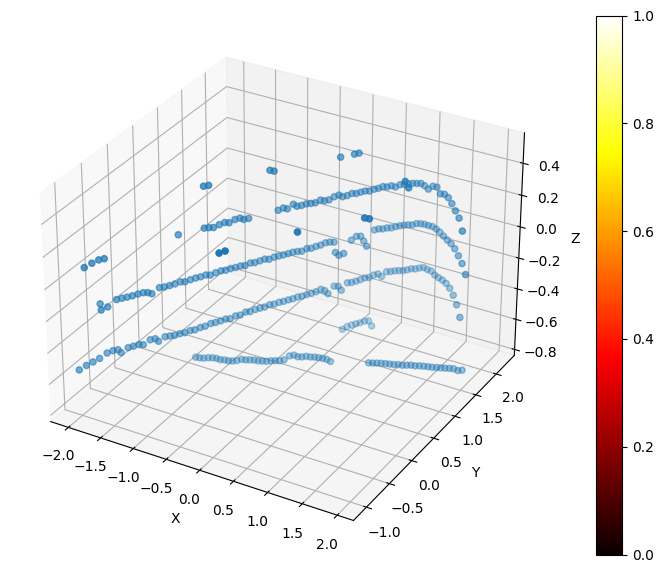

[1083:691][558882] (dtls_transport.cc:529): DtlsTransport[0|1|__]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.


In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,7))
xs = gt_instance_points[0][:, 0]
ys = gt_instance_points[0][:, 1]
zs = gt_instance_points[0][:, 2]

ax = fig.add_subplot(projection='3d')
img = ax.scatter(xs, ys, zs, cmap=plt.hot())
fig.colorbar(img)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
type(gt_instance_points[0][0][0])

In [ ]:
gt_instance_points[0].shape

In [ ]:
data_bin = np.fromfile("/home/jaelee/objdect/CenterPoint/data/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)/gt_database_1sweeps_withoutvelo/car/0_car_0.bin", dtype=np.float64)
data_bin = data_bin.reshape((-1,3))

In [ ]:
data_bin.shape

In [ ]:
fig = plt.figure(figsize=(12,7))
xs = data_bin[:, 0]
ys = data_bin[:, 1]
zs = data_bin[:, 2]

ax = fig.add_subplot(projection='3d')
img = ax.scatter(xs, ys, zs, cmap=plt.hot())
fig.colorbar(img)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### 저장

In [ ]:
root_etri_path = '/mnt/hdd0/etri3Dobj_infra_edge/3D_object_detection_tracking(edge_infra)'
root_etri_path = Path(root_etri_path)

In [ ]:
# pickle 저장
import pickle
with open(root_etri_path / "infos_train.pkl", "wb") as f:
    pickle.dump(train_list, f)
with open(root_etri_path / "infos_val.pkl", "wb") as f:
    pickle.dump(val_list, f)